<a href="https://colab.research.google.com/github/lucasfranca016/BootcampDataScience/blob/main/Modulo6/Modulo_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A cadeia de créditos é formada por 4 pilares:
 - Prospecção
 - Concessão
 - Gestão de risco
 - Recuperação

Nos vamos focar na concessão: Primeiramente nos vamos até uma instituição financeira pedir algum tipo de crédito, como o próprio cartão de crédito, então ela aprova ou não o pedido. Esse pedido passa por um modelo de decisão que então decide se o pedido será aprovado ou não, juntamento com a política de cada banco.

Vamos fazer o Bytebank! Através de uma interface as pessoas irão vir até nós, pedir o crédito e o modelo de decisão, guardado no streamlit, que irá aprovar ou negar o pedido. Focaremos no modelo de decisão.

O streamlit é uma biblioteca de vizualização de dados, onde você coloca o modelo ou uma vizualização que irá virar uma url pública que irá virar o portifólio do seu projeto.

In [ ]:
import pandas as pd

In [ ]:
df_clientes_cadastrados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_cadastrados.csv")
df_clientes_cadastrados.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


In [ ]:
df_clientes_aprovados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_aprovados.csv")
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [ ]:
df_clientes_cadastrados.shape

(438557, 18)

In [ ]:
#Parece que temos 438557 clientes, será que é isso mesmo?

df_clientes_cadastrados['ID_Cliente'].value_counts()

7603224    2
7742853    2
7836711    2
7091721    2
7022327    2
          ..
5372264    1
6412652    1
6410605    1
6367602    1
6291456    1
Name: ID_Cliente, Length: 438510, dtype: int64

Temos menos ID's do que linhas, logo, uma indicação de que cada linha não representa um cliente. Assim, vamos moldas os dados de forma que cada linha represente um cliente e verificaremos se essas linhas com mesmo ID representam os mesmos valores para cada feature ou não.

In [ ]:
#A função duplicated do próprio pandas retorna um valor Booleano para cada linha indicando se ela é duplicada ou n

df_clientes_cadastrados.duplicated().sum()

#Usando o sum vemos que não há linhas duplicadas, complicou.

0

In [ ]:
#Vamos ver quantos ID's duplicados temos:

df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)].shape

#Sem o Keep = False só veriamos metade dos problemas, dado que ele só mostra a linha "original"

(94, 18)

In [ ]:
#Vamos retirar essas linhas duplicadas.

id_repetidos = df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']
id_repetidos

421211    7702516
421268    7602432
421349    7602432
421464    7836971
421698    7213374
           ...   
433158    7282535
433159    7742853
433217    7135270
433666    7091721
433789    7618285
Name: ID_Cliente, Length: 94, dtype: int64

In [ ]:
df_clientes_cadastrados_ID_unicos = df_clientes_cadastrados.drop(id_repetidos.index)

In [ ]:
df_clientes_cadastrados_ID_unicos['ID_Cliente'].value_counts()

6293503    1
5166449    1
6210931    1
5174645    1
5170551    1
          ..
7410037    1
6357367    1
6375806    1
5683584    1
6291456    1
Name: ID_Cliente, Length: 438463, dtype: int64

In [ ]:
df_clientes_cadastrados_ID_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

Não temos dados nulos nesse caso.

In [ ]:
#Explorar mais as colunas:

df_clientes_cadastrados_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

# Desafio 1: Explorar os ID's repetidos(Atualização de cadastro? Erro?), tentar descobrir o motivo da repetição.

# Desafio 2: Explorar as features (colunas) e identificar se elas são contínuas, categóricas e binárias.

# Aula 2

### Errata: Em aula foi confundido a classificação de variáveis contínuas com a de variáveis quantitativas, que inclui as variáveis contínuas com as discretas.

In [ ]:
colunas_quantitativas = ['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado', 'Tamanho_Familia']

In [ ]:
df_clientes_cadastrados_ID_unicos[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,-165.936036,2.194461
std,11.472815,0.724879,1.100832e+05,380.201131,0.897194
min,21.000000,0.000000,2.610000e+04,-1000.700000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


Nos salta aos olhos o -1000 anos trabalhas da feature Anos_empregado, que acaba afetando a média e o desvio padrão também. Nesse dataframe o número negativo significa quanto tempo esta pessoa está desempregada.

In [ ]:
df_clientes_cadastrados_ID_unicos.query("Anos_empregado <= 0")[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
-1000.7         Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

Vemos então que os valores de -1000 anos empregados são atribuídos somenta a pensionistas, sendo um total de 75314 ID's com essa feature e este valor, assim, não é do nosso interesse retirar todos esses dados!

Temos então que modificar esse valor 1000, a ideia sugerida foi de substituir-lo por um valor que retrate melhor a realidade, de que a pessoa em questão não está trabalhando, e que não distorça muito nossos dados

In [ ]:
df_clientes_cadastrados_ID_unicos['Anos_empregado'] = df_clientes_cadastrados_ID_unicos[
    'Anos_empregado'].replace(-1000.7, -1)

Podemos utilizar outras técnicas para encontrar outliers, como as próprias representações visuais.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

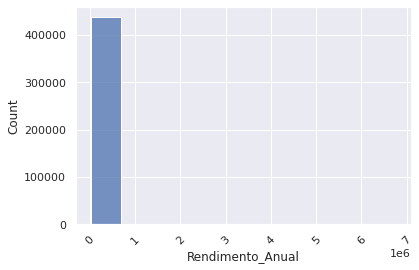

In [ ]:
sns.histplot(data=df_clientes_cadastrados_ID_unicos, x='Rendimento_Anual',bins=10)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_clientes_cadastrados_ID_unicos[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,5.780633,2.194461
std,11.472815,0.724879,1.100832e+05,6.733151,0.897194
min,21.000000,0.000000,2.610000e+04,-1.000000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


Olhando o describe já conseguimos identificar alguns outliers, como por exemplo o evidenciado pelo gráfico, onde o valor máximo de salário que é da ordem de 10⁶ está modificando nossa compreensão dos dados. Também nota-se os valores máximos nas features Qtd_Filhos e Tamanho_Familia.

In [ ]:
coluna = df_clientes_cadastrados_ID_unicos['Rendimento_Anual']

coluna_med = coluna.mean()
coluna_std = coluna.std()

limite_sup = coluna_med + (2 * coluna_std)
limite_inf = coluna_med - (2 * coluna_std)

index_outliers = []

for index, valor in coluna.items():
    if valor > limite_sup or valor < limite_inf:
        index_outliers.append(index)

len(index_outliers)

12641

In [ ]:
df_clientes_cadastrados_sem_outliers = df_clientes_cadastrados_ID_unicos.drop(index_outliers)
df_clientes_cadastrados_sem_outliers.shape

(425822, 18)

In [ ]:
df_clientes_cadastrados_sem_outliers[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,425822.000000,425822.000000,425822.000000,425822.000000,425822.000000
mean,43.838707,0.425314,176384.728083,5.744956,2.191683
std,11.525400,0.723577,75033.530551,6.736649,0.896300
min,21.000000,0.000000,26100.000000,-1.000000,1.000000
25%,34.000000,0.000000,117000.000000,1.000000,2.000000
50%,43.000000,0.000000,157500.000000,4.000000,2.000000
75%,53.000000,1.000000,225000.000000,8.500000,3.000000
max,69.000000,19.000000,405000.000000,48.000000,20.000000


Notamos por exemplo que conseguimos descrever o rendimento anual sem notação científica agora através do método de describe.

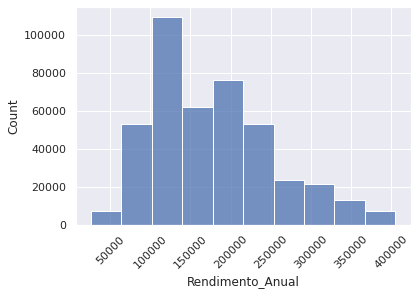

In [ ]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x='Rendimento_Anual',bins=10)
plt.xticks(rotation=45)
plt.show()

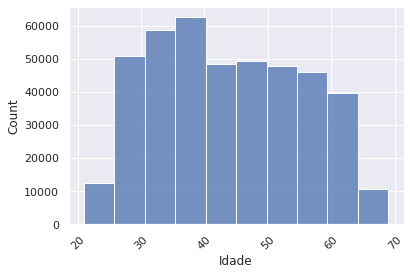

In [ ]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x='Idade',bins=10)
plt.xticks(rotation=45)
plt.show()

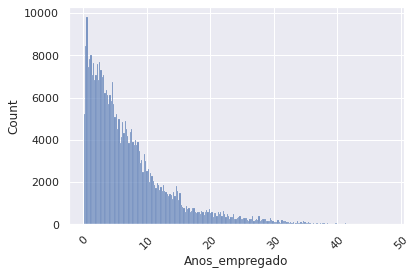

In [ ]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers.query('Anos_empregado > 0'), x='Anos_empregado')
plt.xticks(rotation=45)
plt.show()

Agora vamos trabalhar com as variáveis categóricas

In [ ]:
colunas_categoricas = ['Genero', 'Tem_Carro', 'Tem_Casa_Propria', 'Categoria_de_renda', 'Grau_Escolaridade',
                      'Estado_Civil', 'Moradia', 'Tem_Celular', 'Tem_telefone_trabalho', 'Tem_telefone_fixo',
                      'Tem_email', 'Ocupacao']

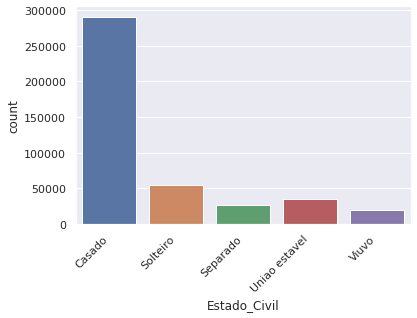

In [ ]:
sns.countplot(x = 'Estado_Civil', data=df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

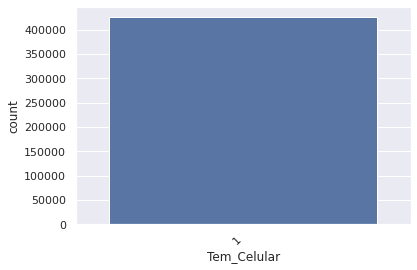

In [ ]:
sns.countplot(x = 'Tem_Celular', data=df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

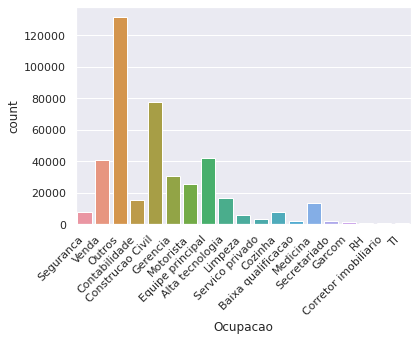

In [ ]:
sns.countplot(x = 'Ocupacao', data=df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

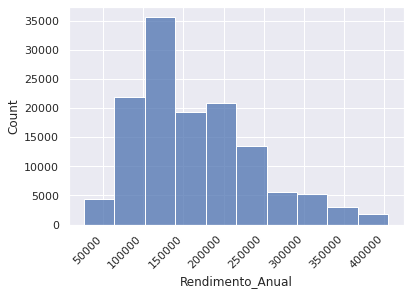

In [ ]:
# Vamos tentar explorar mais esse valor "outros":

sns.histplot(data=df_clientes_cadastrados_sem_outliers.query('Ocupacao == "Outros"'), x='Rendimento_Anual',bins=10)
plt.xticks(rotation=45, ha='right')
plt.show()

Comportamento do recorte da profissão "Outros" através do plot de Rendimento anual se comporta de maneira muito próxima ao plot de Rendimento anual sem cortes algum, assim, fortalecendo a hipótese de que esse valor "Outros" representa outras profissões que não estão já representadas na feature.

Também chegamos a conclusão que a feature "com_celular" é irrelevante para nosso estudo pois não vai contribuir em nada ao treinarmos nosso algoritmo.

Por termos éticos e legais também devemos retirar a feature de "Genero" pois não devemos basear nossa concessão de crédito se o cliente é homem ou mulher. Outros exemplos análogos também foram citados, não devemos usar para treino de um modelo features como Opiniões políticas, religiosas ou filosóficas, genética, sexualidade, origem social ou ética, condições de saúde, etc.

In [ ]:
df_clientes_cadastrados_tratamento1 = df_clientes_cadastrados_sem_outliers.drop(['Genero', 'Tem_Celular'], axis=1)
df_clientes_cadastrados_tratamento1

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
2,5008806,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,0,0,0,Seguranca,2.0,3.1
3,5008808,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4
4,5008809,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4
5,5008810,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4
6,5008811,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0
438553,6840222,0,0,0,103500.0,Empregado,Ensino medio,Solteiro,Casa propria,44.0,0,0,0,Construcao Civil,1.0,8.2
438554,6841878,0,0,0,54000.0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.0,1,0,0,Venda,1.0,1.0
438555,6842765,0,1,0,72000.0,Pensionista,Ensino medio,Casado,Casa propria,59.0,0,0,0,Outros,2.0,-1.0


In [ ]:
colunas_categoricas.remove('Genero')

In [ ]:
colunas_categoricas.remove('Tem_Celular')

# Desafio 3 : Explorar outra maneiras de identificar e tratar os outliers.

# Desafio 4 : Criar uma função para gerar nossos gráficos.

# Desafio 5 : Continuar a análise exploratória dos dados.


# Aula 3

In [ ]:
df_clientes_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
df_clientes_aprovados['ID_Cliente'].value_counts().shape

(45985,)

In [ ]:
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

Logo, mesmo o df de clientes aprovados tendo 1 milhão de linhas, não são todos os clientes contidos no dataframe de clientes cadastrados que estão nele, há um número muito reduzido de clientes aprovados.

Tendo em vista a visão de negócios podemos imaginar que não serão todos os clientes cadastrados que irão pedir algum tipo de crédito ou cartão de crédito, uma parte terá somente uma conta corrente, por exemplo.

In [ ]:
df_clientes_aprovados.query('ID_Cliente == 5001712')

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


A variável mês de referência diz sobre os meses que já passaram, 0 representa o mês atual e -1 o mês anterior ao atual.

In [ ]:
df_clientes_aprovados.query('ID_Cliente == 5001711')

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


In [ ]:
#Entendo melhor a feature Faixa_atraso

df_clientes_aprovados['Faixa_atraso'].value_counts().index.to_list()

['pagamento realizado',
 '1-29 dias',
 'nenhum empréstimo',
 '30-59 dias',
 '>150 dias',
 '60-89 dias',
 '90-119 dias',
 '120-149 dias']

 Uma reflexão que surge agora é de que nossas features categóricas são não binárias, contudo, queremos que no final nossa predição seja algo binário, se o cliente é um bom pagador ou não, assim, como podemos chegar nisto?

In [ ]:
df_registros_creditos_agrupados_ID = df_clientes_aprovados.groupby('ID_Cliente')
ser_abertura = df_registros_creditos_agrupados_ID.apply(lambda x: min(x['Mes_referencia']))
ser_abertura.name = 'Abertura'
ser_abertura

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

In [ ]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_abertura, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [ ]:
ser_final = df_registros_creditos_agrupados_ID.apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'
ser_final

ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

In [ ]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [ ]:
df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [ ]:
df_clientes_aprovados['MOB'] = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

#MOB significa months on the book, é um conhecimento da área bancária e significa o quanto tempo você está listado
#como usuário de créditos neste banco.


,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [ ]:
dict_faixa_atraso_ind ={'nenhum empréstimo': 0, 'pagamento realizado': 1,
                        '1-29 dias': 2, '30-59 dias': 3, '60-89 dias': 4,
                        '90-119 dias': 5, '120-149 dias': 6, '>150 dias': 7}

In [ ]:
df_clientes_aprovados['Ind_Faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


In [ ]:
df_clientes_aprovados['Mau'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] > 3 else 0, axis=1)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


In [ ]:
df_registros_creditos_ID = df_clientes_aprovados[['ID_Cliente','Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)
df_registros_creditos_ID

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


In [ ]:
df_denominador = df_registros_creditos_ID.groupby('Abertura').apply(lambda X: X['ID_Cliente'].count()).reset_index()
df_denominador.columns = ['Abertura','Qtd_Clientes']
df_denominador

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [ ]:
df_vintage = df_clientes_aprovados.groupby(['Abertura','MOB']).apply(lambda X: X['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Abertura','MOB','Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [ ]:
df_vintage = pd.merge(df_vintage[['Abertura','MOB']], df_denominador, on = ['Abertura'], how = 'left')
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


In [ ]:
import numpy as np

In [ ]:
df_vintage['Qtd_Mau'] = np.nan

for j in range(-60,1):
    ls = []
    for i in range(0,61):
        due = list(df_clientes_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente'])
        ls.extend(due)
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(ls))
        
df_vintage['Taxa_de_Mau']  = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']
df_vintage      

,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


In [ ]:
df_vintage_pivot = df_vintage.pivot(index = 'Abertura',
                             columns = 'MOB',
                             values = 'Taxa_de_Mau')

df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


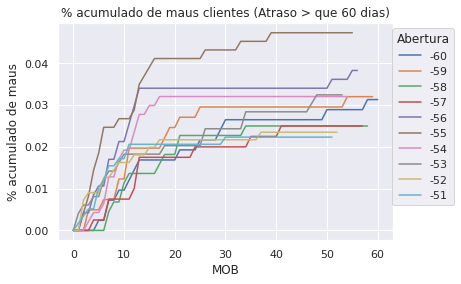

In [ ]:
lst = [i for i in range(0,61)]
df_vintage_pivot[lst].T.iloc[:,:10].plot(legend = True, grid = True, title = '% acumulado de maus clientes (Atraso > que 60 dias)')

plt.xlabel('MOB')
plt.ylabel('% acumulado de maus')
plt.legend(bbox_to_anchor=(1.2, 1), title='Abertura')
plt.show()

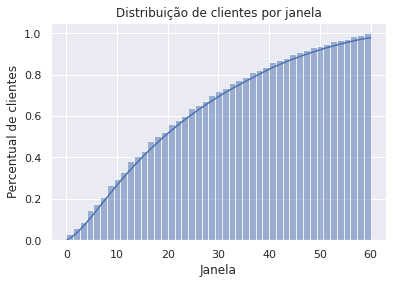

In [ ]:
sns.histplot(data=df_registros_creditos_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

In [ ]:
dict_intervalo_atraso = {'maior_30_dias': 3, 'maior_60_dias': 4, 'maior_90_dias': 5,
                        'maior_120_dias': 6, 'maior_150_dias': 7}

In [ ]:
for chave, valor in dict_intervalo_atraso.items():
  df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1) # mais de 60
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


Aqui fizemos a análise de mau pagador para faixas de atraso não somente maiores que 30 dias, mas para maiores que 60, 90, etc. Basicamente, estamos extendendo a análise anterior as outras faixas de atraso.

In [ ]:
dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) #cumsum
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


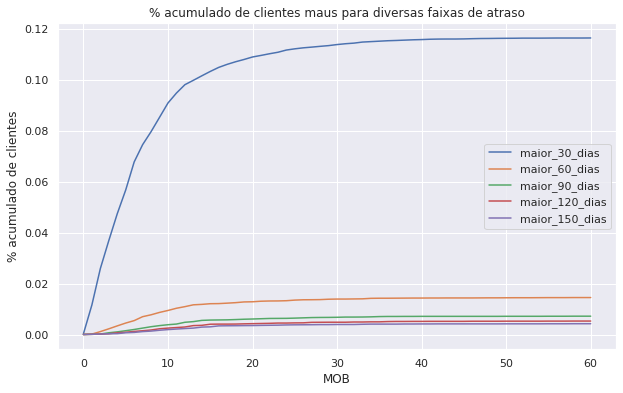

In [ ]:
df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

Comportamento semelhante ao gráfico anterior, mostrando que depois de 12 meses, mais ou menos, a taxa de clientes maus se estabiliza.

Ressaltando aqui que este é um tipo de análise existente no mercado, chamada de análise vintage.

Como evidenciado, manter os clientes que tem Janela menor que doze parece irrelevante pois eles apresentam uma irregularidade muito grande em relação aos créditos, assim, vamos seguir com essa hipótese e vamos ver de quantos clientes mantidos estamos falando:

In [ ]:
 len(df_clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente').count().index)

30918

In [ ]:
df_clientes_aprovados_tratamento1 = df_clientes_aprovados.query('Janela >= 12').copy()
df_clientes_aprovados_tratamento1.shape

(943061, 14)

Vamos criar um dataframe próprio para aplicar o machine learning agora, com uma informação binária se o cliente é um mau pagador ou não, considerando clientes que atrasam mais que 60 dias o pagamento como maus pagadores.

In [ ]:
def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0
  
df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [ ]:
df_registros_creditos_id.shape

(30918, 2)

In [ ]:
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

Agora temos que limitar a nossa base de treinamento somente aos id's que possuim a variável resposta.

In [ ]:
df_registro_clientes_target = df_clientes_cadastrados_tratamento1.merge(df_registros_creditos_id, on= 'ID_Cliente')
df_registro_clientes_target.head()

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008806,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,0,0,0,Seguranca,2.0,3.1,0
1,5008810,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
2,5008811,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
3,5008812,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0
4,5008813,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0


In [ ]:
df_registro_clientes_target['Mau'].value_counts(normalize=True)*100

0    97.726673
1     2.273327
Name: Mau, dtype: float64

Utilizamos hipóteses e metodologias para trabalhar no mundo real, assim, terminando com uma base de dados aplicável para treinamento de um modelo baseada em decisões de negócio reais, contudo, como nada é perfeito, terminamos com uma base de dados SUPER desbalanceadae e vamos ter que lidar com isso agora.

# Desafio 6 : Criar uma tabela com a quantidade de clientes relativos a base por faixa de atraso.

# Desafio 7 : Conhecer técnicas para resolver esse desbalanceamento.


# Aula 4

In [ ]:
colunas_categoricas_binarias = ['Tem_Carro',
                                'Tem_Casa_Propria',
                                'Tem_telefone_trabalho',
                                'Tem_telefone_fixo',
                                'Tem_email']
colunas_categoricas_binarias
#Fizemos essa lista para ter controle da ordem das colunas!

['Tem_Carro',
 'Tem_Casa_Propria',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email']

In [ ]:
colunas_categoricas_nao_binarias = ['Categoria_de_renda',
                                    'Grau_Escolaridade',
                                    'Estado_Civil',
                                    'Moradia',
                                    'Ocupacao']
colunas_categoricas_nao_binarias

['Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Ocupacao']

In [ ]:
df_registro_clientes_target = df_registro_clientes_target[['ID_Cliente'] + colunas_quantitativas +
                                         colunas_categoricas_binarias + colunas_categoricas_nao_binarias + ['Mau']]
df_registro_clientes_target.head()

,ID_Cliente,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008806,59.0,0,112500.0,3.1,2.0,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca,0
1,5008810,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
2,5008811,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
3,5008812,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0
4,5008813,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0


In [ ]:
!pip install scikit-learn==0.23.2 imbalanced-learn==0.7.0

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
# Partindo para o modelo:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix

from scipy import stats

In [ ]:
SEED = 1561651
def roda_modelo(modelo, dados):

    # separando dados em x e y, e tambem removendo a coluna de ID_cliente
    x = dados.drop(['ID_Cliente', 'Mau'], axis=1)
    y = dados.drop('ID_Cliente', axis=1)['Mau']
    
    # Separando dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=SEED)

    # Treinando modelo com os dados de treino
    modelo.fit(x_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")
    
    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(modelo.predict_proba(x_test)[:, 1])
    data_mau = np.sort(modelo.predict_proba(x_test)[:, 0])
    kstest = stats.ks_2samp(data_bom, data_mau)
    print(f"KS {kstest}")

    # Criando matriz de confusão
    matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test, values_format='.0f',
                                            display_labels=['Bons', 'Maus'])
    plt.grid(False)    
    plt.show(matriz_confusao)

    # Fazendo a predição dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))

Uma versão da função roda modelo um pouco modificada, incluindo uma métrica chamada KS.

Ela é uma métrica muito usada no mercado financeiro para medir modelos de crediting score, que é o que estamos fazendo aqui. Basicamente ela vai medir a maior distância da probabilidade de um registro ser bom e de um registro ser mau. Ele é uma medida normalizada.

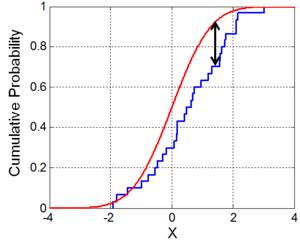

Temos que tratar agora as variáveis categóricas e as variáveis contínuas que não estão tratadas, para isso usaremos técnicas do próprio sklearn.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
# PEP8 padrão CamelCase
class Transformador(BaseEstimator, TransformerMixin):
    def __init__( self, colunas_quantitativas, colunas_categoricas):
        self.colunas_quantitativas = colunas_quantitativas
        self.colunas_categoricas = colunas_categoricas
        self.enc = OneHotEncoder()
        self.scaler = MinMaxScaler()

    def fit(self, X, y = None ):
        self.enc.fit(X[self.colunas_categoricas])
        self.scaler.fit(X[self.colunas_quantitativas])
        return self 

    def transform(self, X, y = None):
      
      X_categoricas = pd.DataFrame(data=self.enc.transform(X[self.colunas_categoricas]).toarray(),
                                  columns= self.enc.get_feature_names(self.colunas_categoricas))
      
      X_quantitativas = pd.DataFrame(data=self.scaler.transform(X[self.colunas_quantitativas]),
                                  columns= self.colunas_quantitativas)
      
      X = pd.concat([X_quantitativas, X_categoricas], axis=1)
        
      return X


In [ ]:
from sklearn.pipeline import Pipeline

AUC 0.5
KS KstestResult(statistic=1.0, pvalue=0.0)


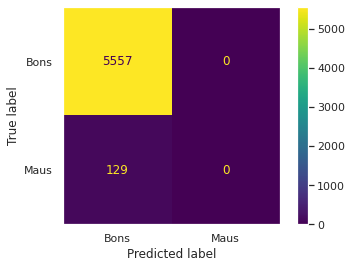


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', DummyClassifier(strategy='prior'))])   
roda_modelo(pipeline, df_registro_clientes_target)

Por isso é importante olharmos para várias métricas, segundo algumas delas o dummy seria um ótimo modelo a ser empregado!

AUC 0.5847293657137516
KS KstestResult(statistic=1.0, pvalue=0.0)


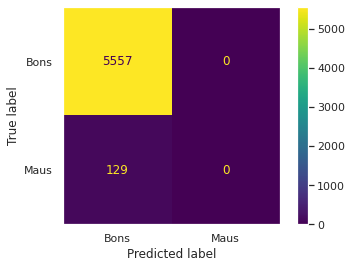


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_target)

Nossos resultados refletem o desbalanceamento dos dados.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

AUC 0.5816603962039637
KS KstestResult(statistic=0.12891311994372143, pvalue=1.420086700226442e-41)


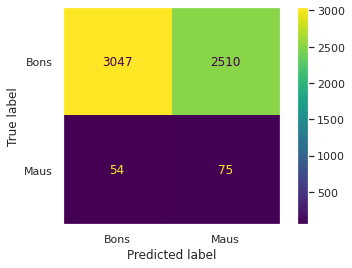


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.55      0.70      5557
           1       0.03      0.58      0.06       129

    accuracy                           0.55      5686
   macro avg       0.51      0.56      0.38      5686
weighted avg       0.96      0.55      0.69      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_target)

Grande perda de acurácia, mas agora o modelo está realmente tentando prever algo e tem alguma eficiência ao invéz de tentar chutar tudo como bons.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

AUC 0.8382939040500634
KS KstestResult(statistic=0.9794231445655998, pvalue=0.0)


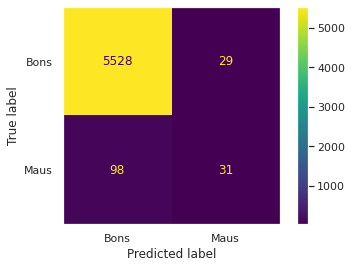


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.52      0.24      0.33       129

    accuracy                           0.98      5686
   macro avg       0.75      0.62      0.66      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_target)

Mesmo com dados desbalanceados o random forest já desempenhou muito melhor que o outro modelo, sem o SMOTE no caso.

AUC 0.8340043216670643
KS KstestResult(statistic=0.9653534998241294, pvalue=0.0)


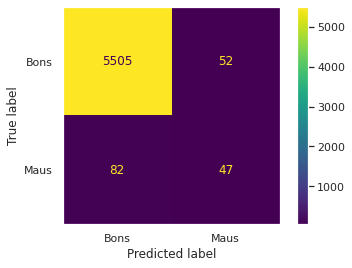


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.47      0.36      0.41       129

    accuracy                           0.98      5686
   macro avg       0.73      0.68      0.70      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_target)

# Desafio 8 : Explorar o undersampling.

# Desafio 9 : Testar outras técnicas como por exemplo : XGboost.

# Desafio 10 : Utilizar otimização de hiperparâmetros e de features.

# Aula 5

In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])  

In [ ]:
x = df_registro_clientes_target.drop(['ID_Cliente', 'Mau'], axis=1)
y = df_registro_clientes_target['Mau']

pipeline.fit(x,y)

Pipeline(steps=[('Transformador',
                 Transformador(colunas_categoricas=['Tem_Carro',
                                                    'Tem_Casa_Propria',
                                                    'Categoria_de_renda',
                                                    'Grau_Escolaridade',
                                                    'Estado_Civil', 'Moradia',
                                                    'Tem_telefone_trabalho',
                                                    'Tem_telefone_fixo',
                                                    'Tem_email', 'Ocupacao'],
                               colunas_quantitativas=['Idade', 'Qtd_Filhos',
                                                      'Rendimento_Anual',
                                                      'Anos_empregado',
                                                      'Tamanho_Familia'])),
                ('sampling', SMOTE(random_state=1561651)),
                (

In [ ]:
from joblib import dump

In [ ]:
dump(pipeline, 'modelo.joblib')

['modelo.joblib']

In [ ]:
features = x.columns
features

Index(['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado',
       'Tamanho_Familia', 'Tem_Carro', 'Tem_Casa_Propria',
       'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
       'Categoria_de_renda', 'Grau_Escolaridade', 'Estado_Civil', 'Moradia',
       'Ocupacao'],
      dtype='object')

In [ ]:
dump(features, 'features.joblib')

['features.joblib']

In [ ]:
lista_campos = df_registro_clientes_target[colunas_categoricas_nao_binarias].apply(lambda x: x.unique(),axis=0)
lista_campos

Categoria_de_renda    [Empregado, Associado comercial, Pensionista, ...
Grau_Escolaridade     [Ensino medio, Ensino superior, Ensino superio...
Estado_Civil          [Casado, Solteiro, Separado, Uniao estavel, Vi...
Moradia               [Casa propria, Alugado, Habitacao publica, Mor...
Ocupacao              [Seguranca, Venda, Outros, Contabilidade, Cons...
dtype: object

In [ ]:
dump(lista_campos, 'lista_campos.joblib')

['lista_campos.joblib']

In [ ]:
roda_modelo